<a href="https://colab.research.google.com/github/SonakshiA/Logistic-Regression-Anemia/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [4]:
dataset='https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset'
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonakshiarora02
Your Kaggle Key: ··········


100%|██████████| 4.61k/4.61k [00:00<00:00, 7.96MB/s]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('anemia.csv')
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Splitting Dataset into Feature/Input Variabales and Target/Output Variables

In [7]:
Y = data['Result']
X = data.drop(columns='Result')
print(X)

      Gender  Hemoglobin   MCH  MCHC   MCV
0          1        14.9  22.7  29.1  83.7
1          0        15.9  25.4  28.3  72.0
2          0         9.0  21.5  29.6  71.2
3          0        14.9  16.0  31.4  87.5
4          1        14.7  22.0  28.2  99.5
...      ...         ...   ...   ...   ...
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1419       0        14.3  16.2  29.5  95.2
1420       0        11.8  21.2  28.4  98.1

[1421 rows x 5 columns]


Here, the Dataset is broken into two parts in a ratio of 70:30. It means 70% data will be used for model training and 30% for model testing.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 100)

In [61]:
print(X.shape,X_train.shape,X_test.shape)

(1421, 5) (994, 5) (427, 5)


Then, we fit our model on the train set using fit() and perform prediction on the test set using predict().

In [62]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
y_pred = logReg.predict(X_test)
y_train_pred = logReg.predict(X_train)

Checking the significance of variables - Since the p-value is less than 0.05, all variables are significant in the model

In [63]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.116951
         Iterations 10
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: Result           Pseudo R-squared: 0.829   
Date:               2023-10-09 19:11 AIC:              342.3737
No. Observations:   1421             BIC:              368.6693
Df Model:           4                Log-Likelihood:   -166.19 
Df Residuals:       1416             LL-Null:          -973.40 
Converged:          1.0000           LLR p-value:      0.0000  
No. Iterations:     10.0000          Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Gender          7.2987   0.6325  11.5396 0.0000  6.0590  8.5383
Hemoglobin     -4.4712   0.3620 -12.3528 0.0000 -5.1807 -3.7618
MCH             0.1041   0

Printing the Confusion Matrix

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(cnf_matrix)

[[237   1]
 [  0 189]]


Building a classification report

In [65]:
from sklearn.metrics import classification_report
target_names = ['without anemia', 'with anemia']
print(classification_report(Y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

without anemia       1.00      1.00      1.00       238
   with anemia       0.99      1.00      1.00       189

      accuracy                           1.00       427
     macro avg       1.00      1.00      1.00       427
  weighted avg       1.00      1.00      1.00       427



Printing the Accuracy Scores

In [67]:
from sklearn.metrics import accuracy_score
print("Testing accuracy: ",accuracy_score(Y_test,y_pred))
print("Training accuracy: ", accuracy_score(Y_train,y_train_pred))

Testing accuracy:  0.9976580796252927
Training accuracy:  0.9949698189134809


Comparing the actual and predicted values

In [15]:
pred_values = pd.DataFrame({'Actual value' : Y_test , 'Predicted value': y_pred})
pred_values.head()

,Actual value,Predicted value
882,0,0
680,0,0
408,1,1
416,0,0
614,0,0


Printing the Curve

<Axes: xlabel='Hemoglobin', ylabel='Result'>

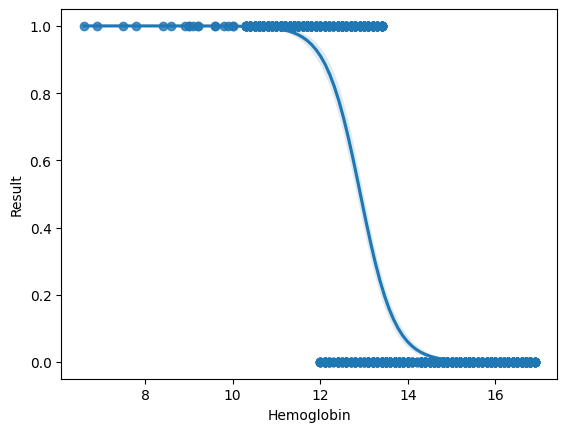

In [51]:
import seaborn as sns
x = data['Hemoglobin']
sns.regplot(x=x, y=Y, data=data, logistic=True)

In [32]:
print(X)

      Gender  Hemoglobin   MCH  MCHC   MCV
0          1        14.9  22.7  29.1  83.7
1          0        15.9  25.4  28.3  72.0
2          0         9.0  21.5  29.6  71.2
3          0        14.9  16.0  31.4  87.5
4          1        14.7  22.0  28.2  99.5
...      ...         ...   ...   ...   ...
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1419       0        14.3  16.2  29.5  95.2
1420       0        11.8  21.2  28.4  98.1

[1421 rows x 5 columns]
